# Imports

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

# Load dataset

In [ ]:
(trainX, trainY), (testX, testY) = mnist.load_data()

trainX = trainX / 255.0
testX = testX / 255.0

train_labels = trainY
test_labels = testY

trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print("Train X dataset shape: ", np.shape(trainX))
print("Train y dataset shape: ", np.shape(trainY))
print("Test X dataset shape: ", np.shape(testX))
print("Test y dataset shape: ", np.shape(testY))

Train X dataset shape:  (60000, 28, 28)
Train y dataset shape:  (60000, 10)
Test X dataset shape:  (10000, 28, 28)
Test y dataset shape:  (10000, 10)


In [ ]:
def show_examples(X, y_real, y_pred):
    fig, ax = plt.subplots(1, 5, figsize=[25, 5])

    for i, img in enumerate(X[:5]):
        ax[i].imshow(img, cmap='Greys')
        ax[i].set_title('y real: ' + str(y_real[i]) +
                        '\ny predicted: ' + str(y_pred[i]))
    plt.show()

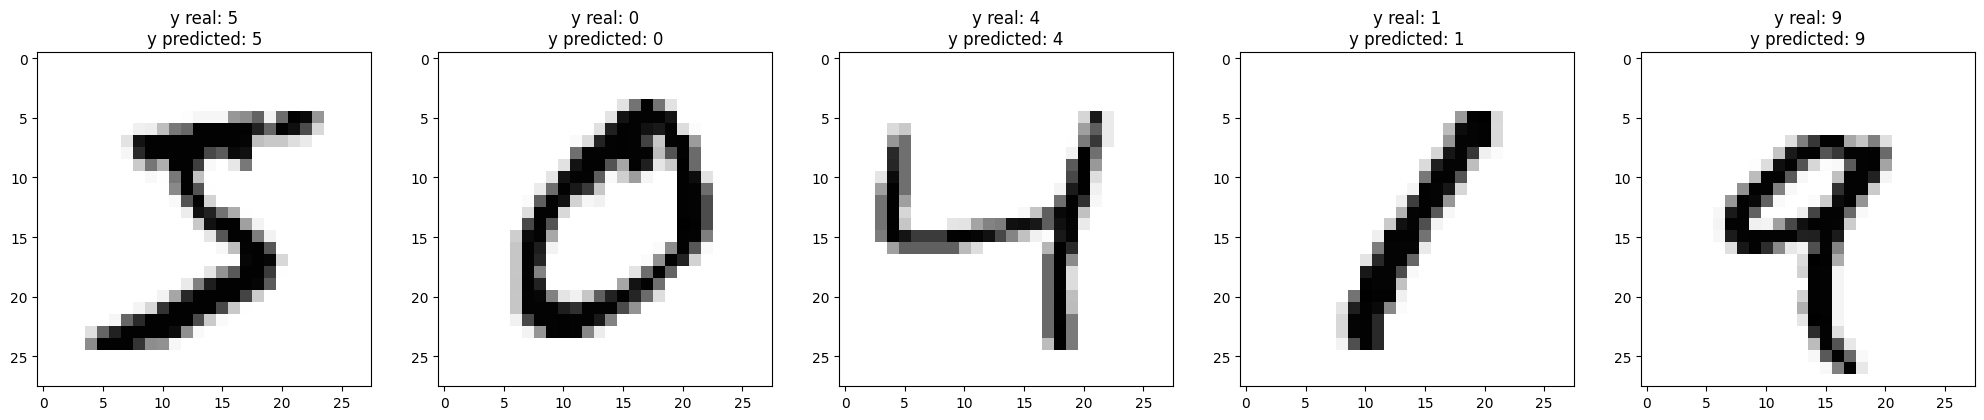

In [ ]:
show_examples(trainX, train_labels, train_labels)

# Model definition

In [ ]:
def create_classifier():
    input = Input(shape=(28, 28, 1))

    x = Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(input)
    x = MaxPooling2D()(x)
    x = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = MaxPooling2D()(x)

    x = Flatten()(x)

    output = Dense(10, activation='softmax')(x)

    return Model(input, output)

In [ ]:
model = create_classifier()
model.summary()
#plot_model(model, show_shapes=True, show_layer_names=False)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0   

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Train model

In [ ]:
history = model.fit(trainX, trainY, epochs=20, batch_size=128, validation_data=(testX, testY), verbose=1)

Epoch 1/20
469/469 [==============================] - 13s 7ms/step - loss: 0.3305 - accuracy: 0.9032 - val_loss: 0.1134 - val_accuracy: 0.9642
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0921 - accuracy: 0.9729 - val_loss: 0.0584 - val_accuracy: 0.9807
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0643 - accuracy: 0.9803 - val_loss: 0.0465 - val_accuracy: 0.9843
Epoch 4/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0521 - accuracy: 0.9840 - val_loss: 0.0489 - val_accuracy: 0.9839
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0450 - accuracy: 0.9865 - val_loss: 0.0415 - val_accuracy: 0.9864
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0398 - accuracy: 0.9880 - val_loss: 0.0371 - val_accuracy: 0.9878
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0358 - accuracy: 0.9892 - val_loss: 0.0541 - val_accuracy: 0.9813
Epoc

# Evaluate the model

In [ ]:
def plot_losses(history):
    plt.rcParams['figure.figsize'] = [20, 5]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

    ax1.set_title('Losses')
    ax1.set_xlabel('epoch')
    ax1.legend(loc="upper right")
    ax1.grid()
    ax1.plot(history['loss'], label='Training loss')
    ax1.plot(history['val_loss'], label='Validation loss')
    ax1.legend()

    ax2.set_title('Accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(loc="upper right")
    ax2.grid()
    ax2.plot(history['accuracy'], label='Training accuracy')
    ax2.plot(history['val_accuracy'], label='Validation accuracy')
    ax2.legend()

    plt.show()

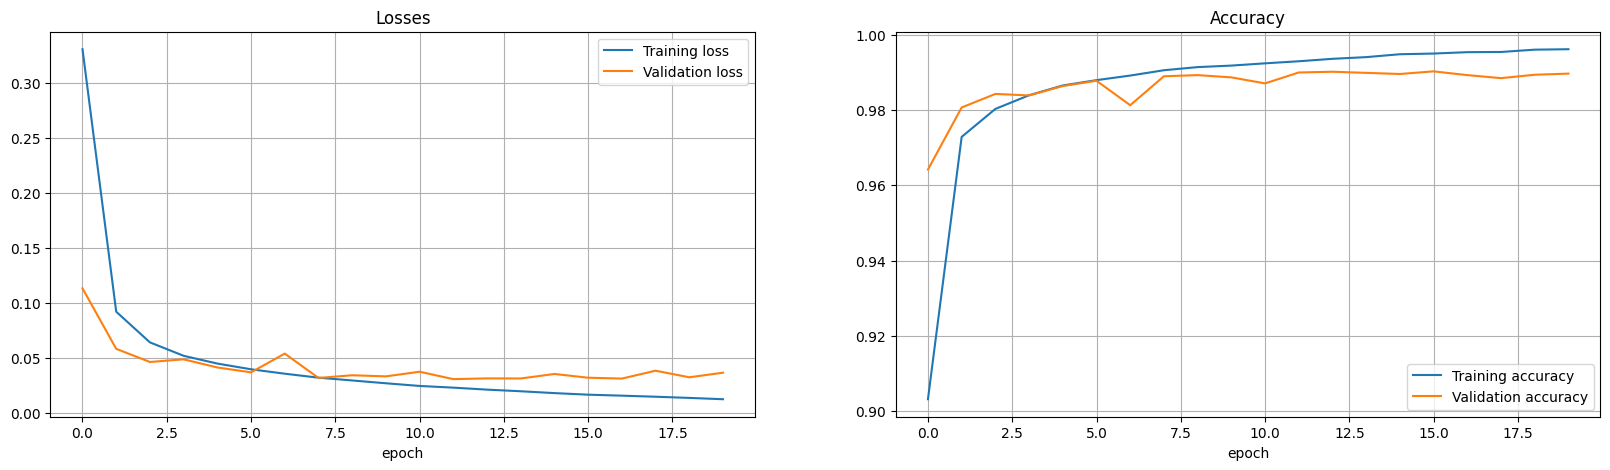

In [ ]:
plot_losses(history.history)

1/1 [==============================] - 0s 48ms/step


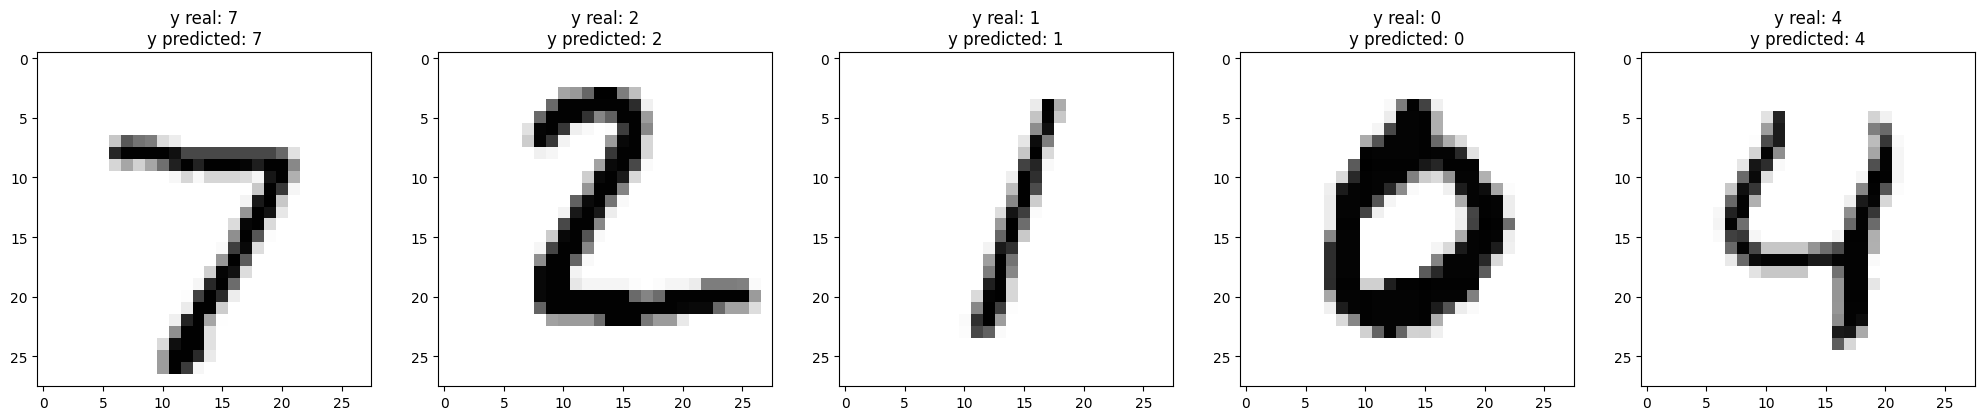

In [ ]:
y_pred = model.predict(testX[:5]).argmax(axis=-1)

show_examples(testX[:5], test_labels[:5], y_pred)

---

Creado por **Guillermo Iglesias** (guillermo.iglesias@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">